In [1]:
import pandas as pd
import numpy as np

# Importing the original dataset in SAS format
path = 'C:/Users/Kenneth/Desktop/18040394_KennethLauKhengSoong_Aug21/System Files/Original Data Files/ed2015-sas.sas7bdat'

# Selecting only required variables from the original dataset
df = pd.read_sas(path)
df1 = df[['WAITTIME','AGER','SEX','ARREMS','AMBTRANSFER','IMMEDR','PAINSCALE','HOSPCODE','PATCODE']]

# Writing out the dataset with only the chosen variables
df1.to_csv('C:/Users/Kenneth/Desktop/18040394_KennethLauKhengSoong_Aug21/System Files/Original Data Files/ED2015.csv', index=False)

In [2]:
# Reading the dataset with only chosen variables
ed15 = pd.read_csv('C:/Users/Kenneth/Desktop/18040394_KennethLauKhengSoong_Aug21/System Files/Original Data Files/ED2015.csv')

# Data cleaning
ed15['WAITTIME'] = ed15['WAITTIME'].replace([-9], np.NaN)
ed15['SEX'] = ed15['SEX'].replace([1], 0)
ed15['SEX'] = ed15['SEX'].replace([2], 1)
ed15['ARREMS'] = ed15['ARREMS'].replace([-8], np.NaN)
ed15['ARREMS'] = ed15['ARREMS'].replace([-9], np.NaN)
ed15['ARREMS'] = ed15['ARREMS'].replace([2], 0)
ed15['AMBTRANSFER'] = ed15['AMBTRANSFER'].replace([-8], np.NaN)
ed15['AMBTRANSFER'] = ed15['AMBTRANSFER'].replace([-9], np.NaN)
ed15['AMBTRANSFER'] = ed15['AMBTRANSFER'].replace([-7], 3)
ed15['IMMEDR'] = ed15['IMMEDR'].replace([0], 6)
ed15['IMMEDR'] = ed15['IMMEDR'].replace([-8], np.NaN)
ed15['IMMEDR'] = ed15['IMMEDR'].replace([-9], np.NaN)
ed15['PAINSCALE'] = ed15['PAINSCALE'].replace([-8], np.NaN)
ed15['PAINSCALE'] = ed15['PAINSCALE'].replace([-9], np.NaN)

In [3]:
# Printing the descriptive analysis
print("\nDescriptive Analysis of ED2015 Before Data Pre-processing\n")
descanalysis = ed15['WAITTIME'].describe()
print(descanalysis)

# Printing all variables with their number of missing values
print("\nNumber of Missing Values Found for Each Variable\n")
summiss = ed15.isnull().sum()
print(summiss)


Descriptive Analysis of ED2015 Before Data Pre-processing

count    17865.000000
mean        38.400504
std         74.922148
min         -7.000000
25%          6.000000
50%         17.000000
75%         42.000000
max       1305.000000
Name: WAITTIME, dtype: float64

Number of Missing Values Found for Each Variable

WAITTIME       3196
AGER              0
SEX               0
ARREMS          615
AMBTRANSFER     645
IMMEDR         4671
PAINSCALE      6196
HOSPCODE          0
PATCODE           0
dtype: int64


In [4]:
from sklearn.impute import KNNImputer # Importing the K-Nearest Neighbor Package

imputer = KNNImputer() # Defining the Imputer

imputed_waittime = imputer.fit_transform(ed15) # Fitting the Imputer and Transforming it onto the Dataset
ed15_temp = pd.DataFrame(imputed_waittime) # Creating a temporary dataframe to store the imputed values
ed15_temp.columns = ed15.columns # Copying the columns from the main dataframe to the temporary dataframe

# Replacing the imputed values for variables with missing values from the temporary dataframe to the existing dataframe
ed15['WAITTIME'] = ed15_temp['WAITTIME']

In [5]:
# Imputing the categorical variable 'ARREMS' using mode imputation
for column in ['ARREMS']:
    ed15[column].fillna(ed15[column].mode()[0], inplace = True)
ed15['ARREMS'] = ed15['ARREMS'].replace([3], 2)
    
# Imputing the categorical variable 'AMBTRANSFER' using mode imputation
for column in ['AMBTRANSFER']:
    ed15[column].fillna(ed15[column].mode()[0], inplace = True)

In [6]:
from sklearn.experimental import enable_iterative_imputer # Required to import Iterative Imputer package
from sklearn.impute import IterativeImputer # Importing the iterative imputer package used by MICE

# Defining the imputer
mice_imputer = IterativeImputer()

# Fitting and transforming the imputed values and importing it into a temporary dataframe
ed15filled = mice_imputer.fit_transform(ed15)
ed15filled_temp = pd.DataFrame(ed15filled)

# Matching the temporary dataframe columns with the original dataframe
ed15filled_temp.columns = ed15.columns

# Replacing missing values in the original dataframe with imputed values from the temporary dataframe
ed15['IMMEDR'] = ed15filled_temp['IMMEDR']
ed15['PAINSCALE'] = ed15filled_temp['PAINSCALE']

In [7]:
# Rounding up the imputed results to the nearest integer

ed15['WAITTIME'] = ed15['WAITTIME'].round()
ed15['IMMEDR'] = ed15['IMMEDR'].round()
ed15['PAINSCALE'] = ed15['PAINSCALE'].round()

# Printing temporary dataframe to view the changes
ed15[:20]

,WAITTIME,AGER,SEX,ARREMS,AMBTRANSFER,IMMEDR,PAINSCALE,HOSPCODE,PATCODE
0,18.0,3.0,1.0,0.0,3.0,4.0,10.0,1.0,1.0
1,103.0,4.0,1.0,1.0,2.0,4.0,3.0,1.0,2.0
2,73.0,4.0,1.0,1.0,2.0,3.0,8.0,1.0,3.0
3,27.0,3.0,0.0,0.0,3.0,4.0,7.0,1.0,4.0
4,1.0,3.0,1.0,0.0,3.0,4.0,5.0,1.0,5.0
5,26.0,3.0,0.0,0.0,3.0,5.0,0.0,1.0,6.0
6,55.0,2.0,0.0,0.0,3.0,3.0,7.0,1.0,7.0
7,69.0,2.0,1.0,0.0,3.0,5.0,0.0,1.0,8.0
8,20.0,3.0,1.0,0.0,3.0,2.0,0.0,1.0,9.0
9,12.0,3.0,1.0,0.0,3.0,4.0,6.0,1.0,10.0


In [8]:
# Printing descriptive analysis of the cleaned dataset
print("\nDescriptive Analysis of ED2015 After Data Imputations\n")
descanalysisclean = ed15['WAITTIME'].describe()
print(descanalysisclean)

# Printing the number of missing values to double check
print("\nNumber of Missing Values Found for Each Variable\n")
newmiss = ed15.isnull().sum()
print(newmiss)

# Writing out the cleaned dataset for descriptive analysis merging
ed15.to_csv('C:/Users/Kenneth/Desktop/18040394_KennethLauKhengSoong_Aug21/System Files/Datasheets/ED15Continuous.csv', index=False)


Descriptive Analysis of ED2015 After Data Imputations

count    21061.000000
mean        38.026969
std         70.206875
min         -7.000000
25%          7.000000
50%         19.000000
75%         43.000000
max       1305.000000
Name: WAITTIME, dtype: float64

Number of Missing Values Found for Each Variable

WAITTIME       0
AGER           0
SEX            0
ARREMS         0
AMBTRANSFER    0
IMMEDR         0
PAINSCALE      0
HOSPCODE       0
PATCODE        0
dtype: int64


In [9]:
# Transforming the values in the variable wait time to a categorical value
ed15.loc[(ed15['WAITTIME'] >= 0) & (ed15['WAITTIME'] <= 10), 'WAITTIME'] = 1
ed15.loc[(ed15['WAITTIME'] > 10) & (ed15['WAITTIME'] <= 60), 'WAITTIME'] = 2
ed15.loc[(ed15['WAITTIME'] > 60)] = 3
ed15.loc[(ed15['WAITTIME'] < 0), 'WAITTIME'] = 0

In [10]:
# Writing the clean dataset into a .csv file
ed15.to_csv('C:/Users/Kenneth/Desktop/18040394_KennethLauKhengSoong_Aug21/System Files/Datasheets/ED15.csv', index=False)

2.0    10696
1.0     6136
3.0     3500
0.0      729
Name: WAITTIME, dtype: int64


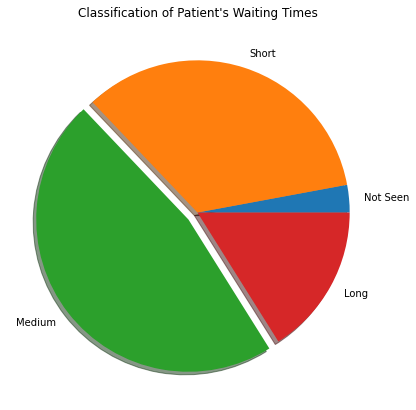

In [11]:
import matplotlib.pyplot as plt

# Finding the values of waiting time
wtt = ed15['WAITTIME'].value_counts()
print(wtt)

# Plotting a pie chart for waiting time classification
waittimelabel = ['Not Seen', 'Short', 'Medium', 'Long']
waittimedata = [593, 6935, 9500, 3263]
explode = (0.0, 0.0, 0.075, 0.0)

fig = plt.figure(figsize = (10, 7))
plt.pie(waittimedata,
        labels = waittimelabel,
        explode = explode,
        shadow = True)

plt.title("Classification of Patient's Waiting Times")
plt.show()

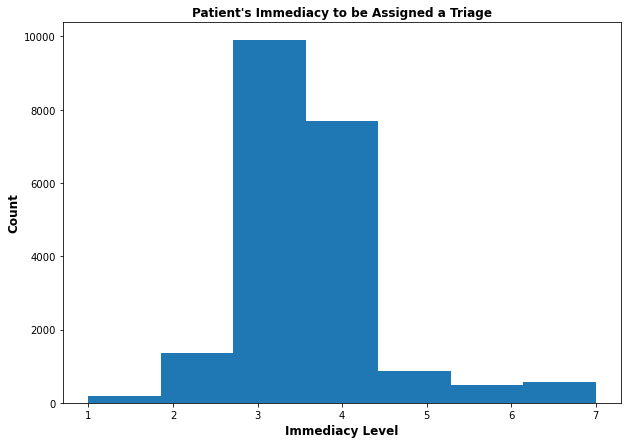

In [12]:
# Plotting a histogram for patient's immediacy to be assigned to a triage
immedrax = ed15.hist(column='IMMEDR',
                     bins = 7,
                     grid = False,
                     figsize = (10, 7))

immedrax = immedrax[0]
for x in immedrax:
    x.set_title("Patient's Immediacy to be Assigned a Triage",
                weight = 'bold',
                size = 12)
    x.set_xlabel("Immediacy Level",
                 weight = 'bold',
                 size = 12)
    x.set_ylabel("Count",
                 weight = 'bold',
                 size = 12)

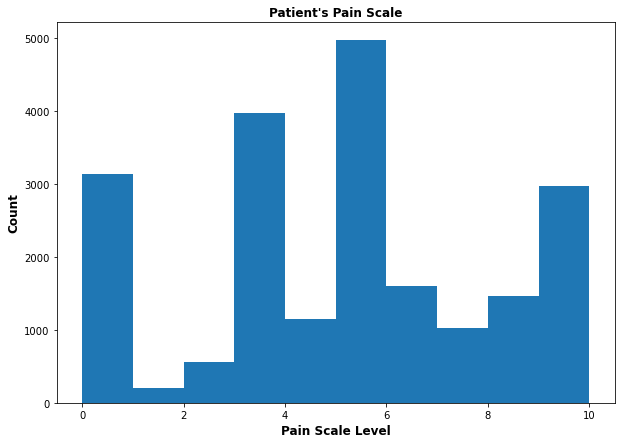

In [13]:
# Plotting a histogram for patient's described pain scale
psax = ed15.hist(column='PAINSCALE',
                     bins = 10,
                     grid = False,
                     figsize = (10, 7))

psax = psax[0]
for x in psax:
    x.set_title("Patient's Pain Scale",
                weight = 'bold',
                size = 12)
    x.set_xlabel("Pain Scale Level",
                 weight = 'bold',
                 size = 12)
    x.set_ylabel("Count",
                 weight = 'bold',
                 size = 12)